In [1]:
#non ho il dataset, ne genero uno
np.random.seed(42)
n_samples = 1000

data = {
    'feature_audio_1': np.random.normal(0, 1, n_samples),
    'feature_audio_2': np.random.normal(5, 2, n_samples),
    'feature_freq': np.random.exponential(1, n_samples),
    'feature_spectral': np.random.uniform(-1, 1, n_samples),
    'language': np.random.choice(['English', 'Italian', 'French'], n_samples, p=[0.5, 0.3, 0.2]) # Sbilanciato apposta
}

df = pd.DataFrame(data)

# Inseriamo qualche NaN per il punto 3
df.loc[::50, 'feature_audio_1'] = np.nan
df.loc[::100, 'feature_freq'] = np.nan

ù
df.to_csv('mock_exam_data.csv', index=False)

print("File 'mock_exam_data.csv' creato con successo!")
print(df.head())

File 'mock_exam_data.csv' creato con successo!
   feature_audio_1  feature_audio_2  feature_freq  feature_spectral language
0              NaN         7.798711           NaN         -0.395161  Italian
1        -0.138264         6.849267      0.068289          0.126817  Italian
2         0.647689         5.119261      0.428970          0.607610   French
3         1.523030         3.706126      0.117656         -0.725703  English
4        -0.234153         6.396447      1.651486          0.161398  English


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [19]:
df = pd.read_csv('mock_exam_data.csv')
print(f'{df.head()}\n')
print(f'{df.shape}\n')
print(f'{df.describe()}\n')
print(f'{df.info()}\n')
print(f'{df.isnull().sum()}\n')

   feature_audio_1  feature_audio_2  feature_freq  feature_spectral language
0              NaN         7.798711           NaN         -0.395161  Italian
1        -0.138264         6.849267      0.068289          0.126817  Italian
2         0.647689         5.119261      0.428970          0.607610   French
3         1.523030         3.706126      0.117656         -0.725703  English
4        -0.234153         6.396447      1.651486          0.161398  English

(1000, 5)

       feature_audio_1  feature_audio_2  feature_freq  feature_spectral
count       980.000000      1000.000000    990.000000       1000.000000
mean          0.020550         5.141672      0.988238         -0.030345
std           0.981418         1.994909      0.983982          0.567100
min          -3.241267        -0.880777      0.000012         -0.999939
25%          -0.647590         3.787517      0.283237         -0.525316
50%           0.022757         5.126154      0.694152         -0.034687
75%           0.649083

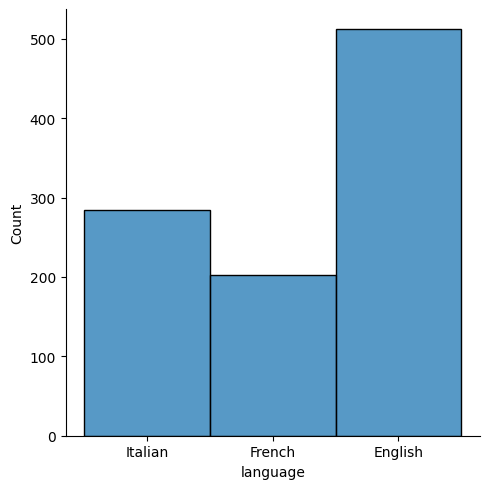

In [5]:
sns.displot(df, x=df['language'],binwidth=3)

<Axes: >

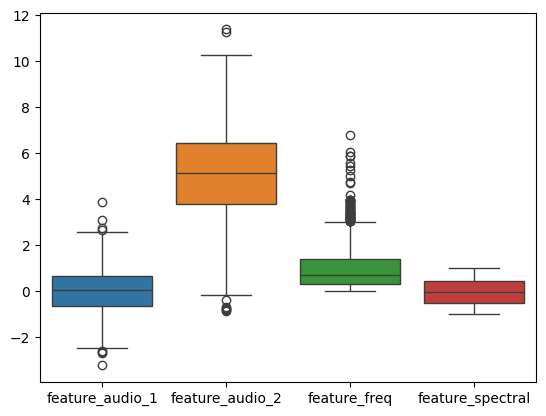

In [6]:
sns.boxplot(df.drop(columns=['language']))

In [23]:
df = df.dropna()
df.isnull().sum()

,0
feature_audio_1,0
feature_audio_2,0
feature_freq,0
feature_spectral,0
language,0


In [22]:
le = LabelEncoder()
df['language'] = le.fit_transform(df['language'])
df.head()

,feature_audio_1,feature_audio_2,feature_freq,feature_spectral,language
0,NaN,7.798711,NaN,-0.395161,2
1,-0.138264,6.849267,0.068289,0.126817,2
2,0.647689,5.119261,0.428970,0.607610,1
3,1.523030,3.706126,0.117656,-0.725703,0
4,-0.234153,6.396447,1.651486,0.161398,0


best params:
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
best recall macro:
0.3402
              precision    recall  f1-score   support

     English       0.51      0.92      0.65       100
      French       0.00      0.00      0.00        40
     Italian       0.36      0.07      0.12        56

    accuracy                           0.49       196
   macro avg       0.29      0.33      0.26       196
weighted avg       0.36      0.49      0.37       196



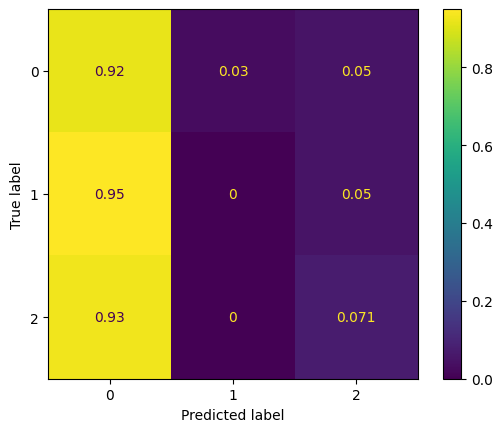

In [42]:
x = df.drop(columns=['language'])
y = df['language']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

params_grid = {
    'max_depth': [2,4,6],
    'criterion': ['gini','entropy','log_loss'],
    'min_samples_leaf': [1,2,3]
}

dt = GridSearchCV(estimator = DecisionTreeClassifier(random_state=42), cv=3, param_grid=params_grid, scoring='recall_macro')
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print(f'best params:\n{dt.best_params_}')
print(f'best recall macro:\n{dt.best_score_:.4f}')
best_model = dt.best_estimator_

print(classification_report(ytest, ypred, target_names=le.classes_))

cm = confusion_matrix(ytest, ypred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()


In [48]:
params_gridRF = {
    'max_depth':[8,12,20],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [1,2]
}

rf = GridSearchCV(estimator= RandomForestClassifier(random_state=42), param_grid=params_gridRF, cv=3, scoring='recall_macro')
rf.fit(xtrain, ytrain)
yrfpred = rf.predict(xtest)
best_modelrf = rf.best_estimator_
print(f'best params for rf:\n {rf.best_params_}')
print(f'best recall macro for rf:\n {rf.best_score_:.4f}')
target_names=['English', 'French', 'Italian']
classification_reportrf = classification_report(ytest, yrfpred, target_names=target_names, zero_division=0)
print(classification_reportrf)

best params for rf:
 {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2}
best recall macro for rf:
 0.3306
              precision    recall  f1-score   support

     English       0.51      0.96      0.67       100
      French       0.00      0.00      0.00        40
     Italian       0.25      0.04      0.06        56

    accuracy                           0.50       196
   macro avg       0.25      0.33      0.24       196
weighted avg       0.33      0.50      0.36       196



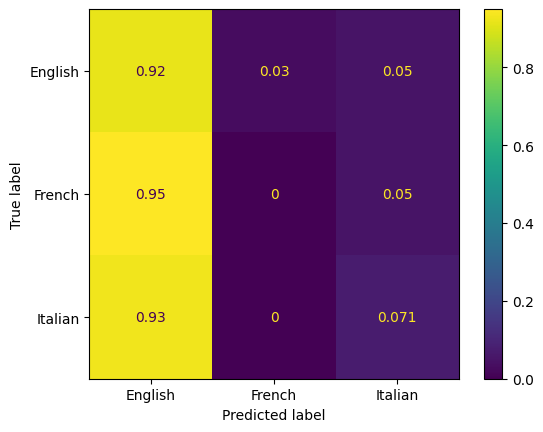

In [41]:
cmrf = confusion_matrix(ytest, yrfpred,normalize='true')
disprf = ConfusionMatrixDisplay(cmrf, display_labels=rf.classes_)
disp.plot()